# MNIST


## Clasificación avanzada

#### Description
MNIST Project
• Write a program in Python using the ML template and the libraries sklearn and tensorflow to identify hand-written digits. 
• Use the MNIST dataset with 60,000 images for the training set and 10,000 images for the test set. 
• Test the performance of the following algorithms:

• Logistic Regression 
• SVM
• Random Forest 
• Neural Network (MLP) 
• CNN

• Document thoroughly your code in Jupyter Notebook, include tables summarizing your results. 
• Make a 5 minute video explaining your work.

# 0. Library import
We import all the required Python libraries

In [1]:
# Data set
from sklearn.datasets import fetch_openml

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Data preprocessing
from sklearn import preprocessing

# Algorithms
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn import svm
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
# Neural Network (MLP) 
from sklearn.neural_network import MLPClassifier
# CNN
import tensorflow as tf
from tensorflow import keras
# CNN Model
from keras.models import Sequential
# CNN convolution layers
from keras.layers import Conv2D, Lambda, MaxPooling2D
# CNN core layers
from keras.layers import Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
# Utility for CNN confusion matrix data preprocessing
from keras.utils.np_utils import to_categorical
# Cross validation used for CNN
from sklearn.model_selection import cross_val_score

# 1. Read Data

Retrieve all the required data for the analysis from sklearn.datasets.

In [2]:
mnist = fetch_openml('mnist_784', version=1)

This retrieved a data set with 9 keys, those include data (numerical representation of the image pixels), target (the labels) and DESCR (the general description of the data set).

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist["data"]

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
2          0.0  ...       0.0       0.0       0.0       0.0       0.0   
3          0.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
69995       0.0       0.0       0.0       0.0       0.0  
69996       0.0       0.0       0.0       0.0       0.0  
69997       0.0       0.0       0.0       0.0       0.0  
69998       0.0       0.0       0.0       0.0       0.0  
69999       0.0       0.0       0.0       0.0       0.0  

[70000 rows x 784 columns]

In [5]:
mnist.data.shape

(70000, 784)

As we can see, the data is in a 2D array, with colums named as pixel1 to pixel784 and 70 000 rows. This implies that the train set (60 000 rows) and the test set (10 000 rows) are not separated.

In [6]:
mnist["target"]

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

We can confirm the labels being found in the target array. Of the dtype category, wich enclose values from '0'-'9'. Shape help us to confirm the rows and size of the 1D array.

In [7]:
mnist.target.shape

(70000,)

Meanwhile target only has 70 000 elements (of dtype category). For more details

In [8]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

# 2. Data Preprocessing

We need to separate Data and Target arrays into train and test sets. We use x for training set and y for prediction set:

In [9]:
X, y = mnist["data"], mnist["target"]

Let´s confirm X and y shapes:

In [10]:
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

Access X[42] to confirm the content was loaded properly:

In [12]:
X.values[42]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

## 2.1 Visualize Data

Those were the numeric values of the pixels, but they are difficult to visualize as humans, instead we shall use matplotlib to print them as an image, using their respective target (label) value from y:

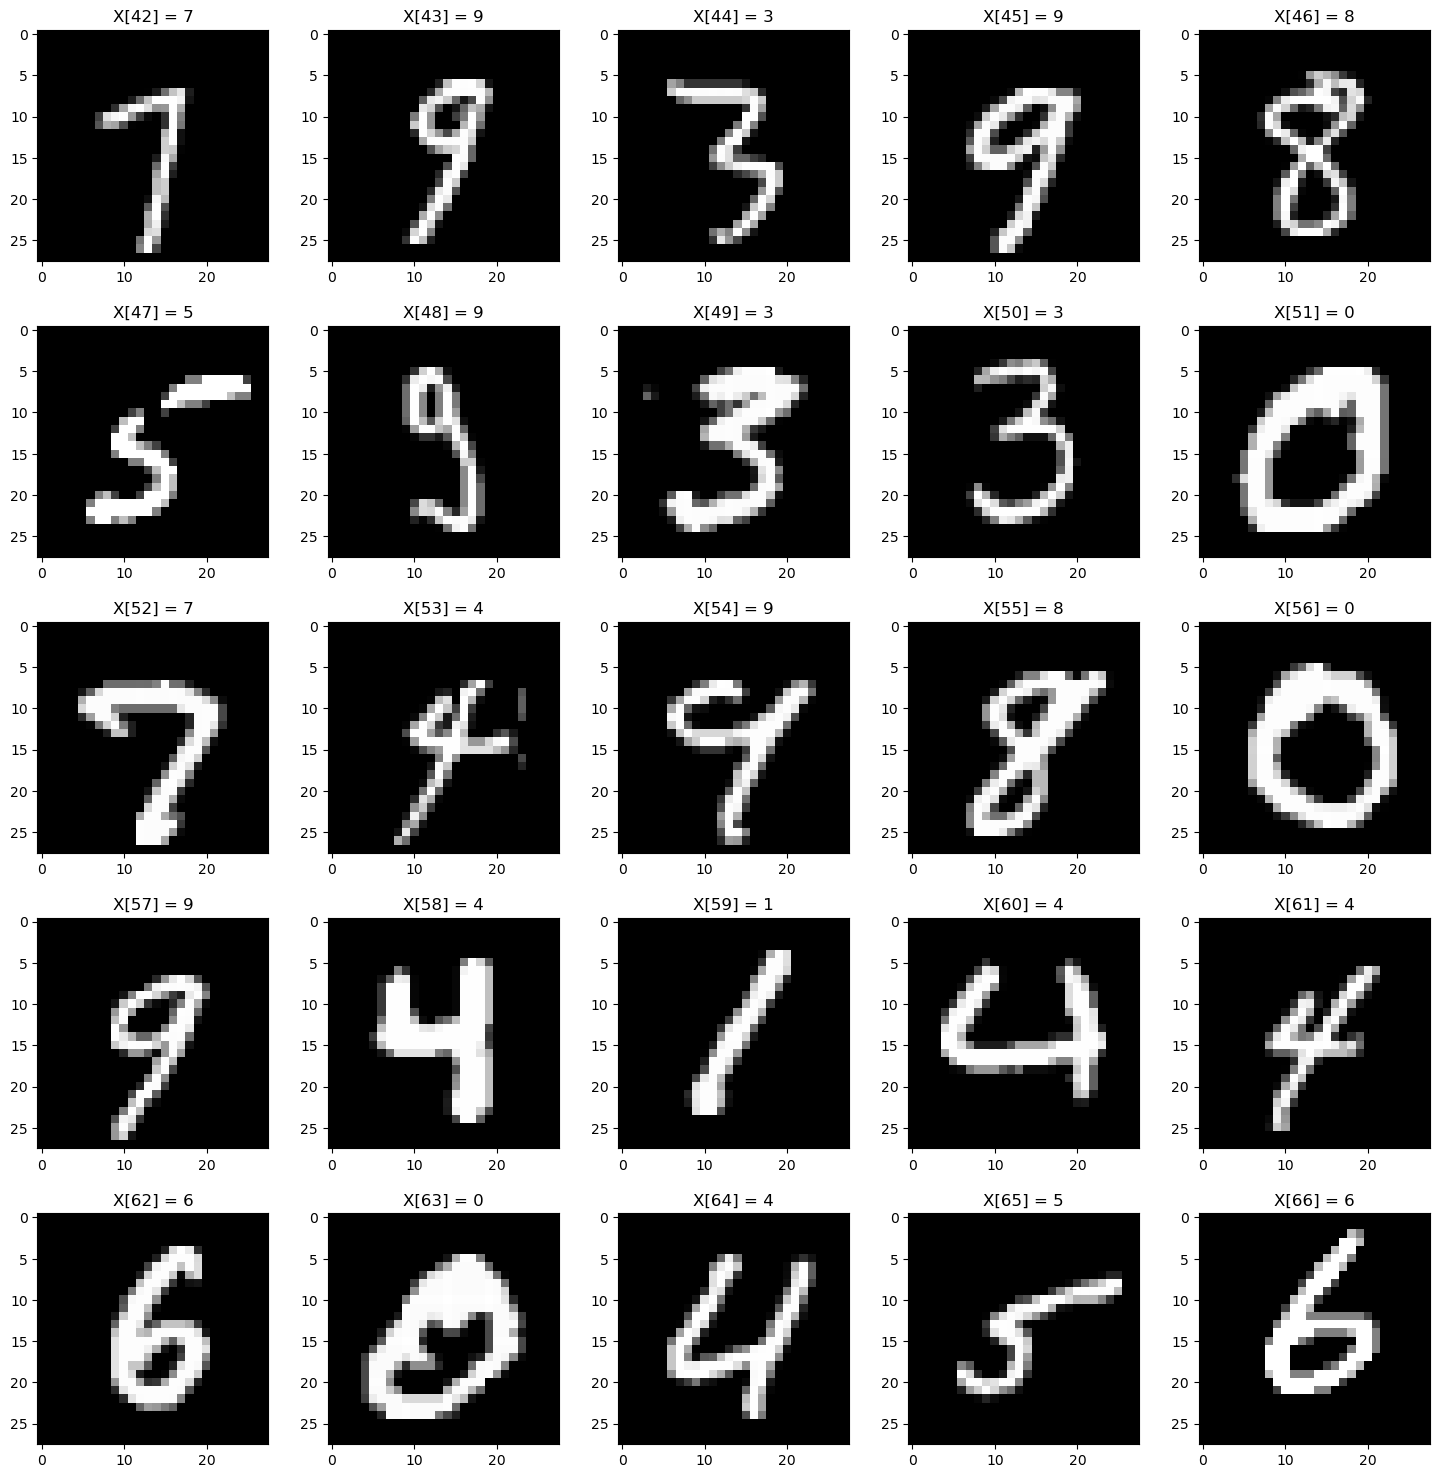

In [13]:
plt.figure(figsize=(15,15))
for i in range(25):
    # Select any number:
    any_number = X.values[42+i]
    # Transform it into an equivalent 2D array
    any_digit_image = any_number.reshape(28,28)
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(any_digit_image, cmap='gray', interpolation="nearest")
    xlabel = 'X[{X}] = {y}'.format(X=(42+i), y=y.values[42+i])
    plt.title(xlabel)
    plt.tight_layout(pad=1.5)
plt.show()

They match. Now we can proceed to split them into train and test sets. Using index notation, remember that python takes that index -1:

In [17]:
X_train, X_test, y_train, y_test = X.values[:60000], X.values[60000:], y.values[:60000], y.values[60000:]

## 2.2 Data Shapes

Finally, lets verify the shapes of the new sets:

In [18]:
X_train.shape

(60000, 784)

In [19]:
X_test.shape

(10000, 784)

In [20]:
y_train.shape

(60000,)

In [21]:
y_test.shape

(10000,)

Now we can see the 2 data sets in X for train and test, and the 2 label sets in y also for train and test.

## 2.3 Data Scaling vs Data normalization

Due to error trying to converge using linear regression, it is needed further preprocessing. 
But first i need to choose between Scaling using StandarScaler or Normalize using xmax division.
I will visually analyze both scenarios:

### Scaling using StandarScaler:

In [22]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaler = scaler.transform(X_train)

In [23]:
X_scaler[42]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.41807799e-03, -5.75481961e-03, -4.08251693e-03, -4.08251693e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08251693e-03, -4.70968827e-03, -8.79934640e-03, -1.15905591e-02,
       -1.47589798e-02, -1.92848546e-02, -2.46717975e-02, -2.90710271e-02,
       -3.05926583e-02, -3.11640127e-02, -3.19628719e-02, -3.02025355e-02,
       -3.13102175e-02, -2.83833960e-02, -2.31191906e-02, -1.91666260e-02,
       -1.67723008e-02, -1.09963601e-02, -8.32486080e-03, -4.38069356e-03,
        0.00000000e+00,  

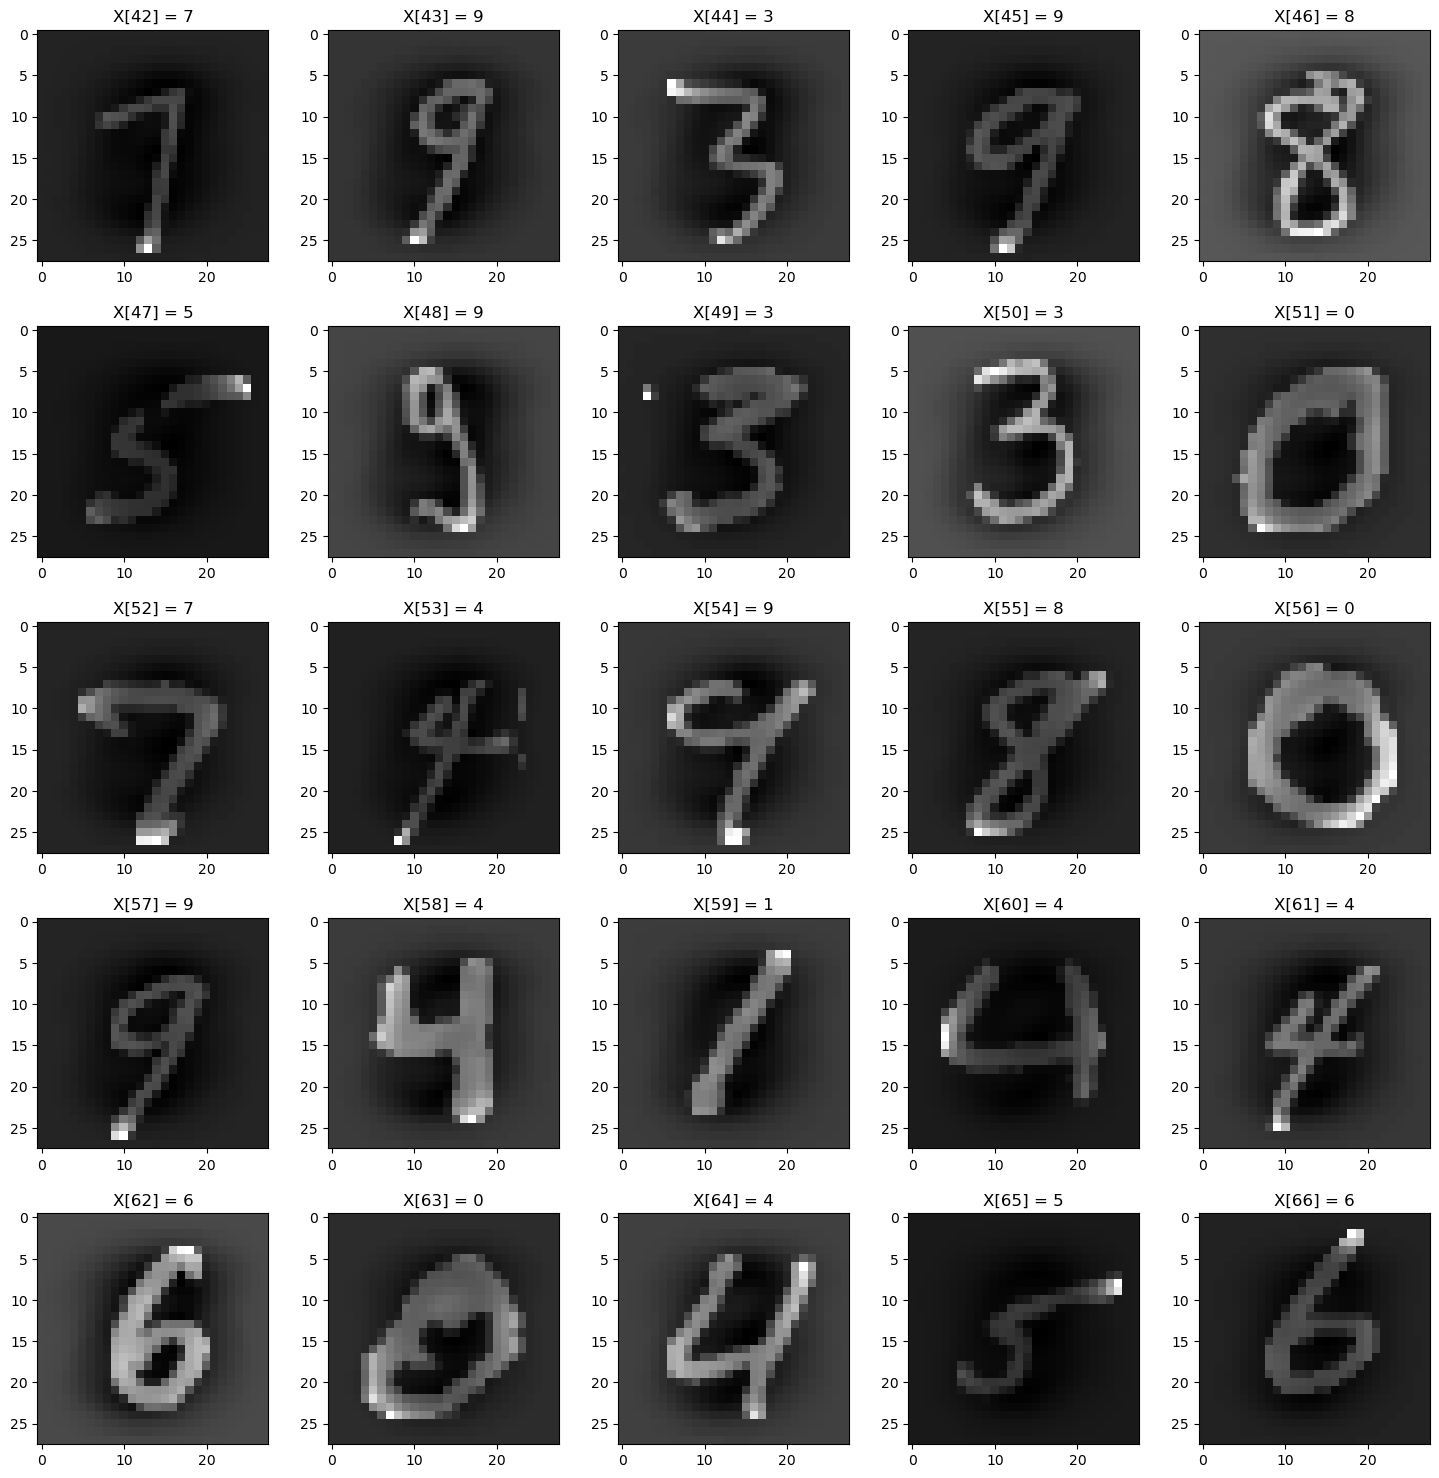

In [24]:
plt.figure(figsize=(15,15))
for i in range(25):
    # Select any number:
    any_number = X_scaler[42+i]
    # Transform it into an equivalent 2D array
    any_digit_image = any_number.reshape(28,28)
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(any_digit_image, cmap='gray', interpolation="nearest")
    xlabel = 'X[{X}] = {y}'.format(X=(42+i), y=y.values[42+i])
    plt.title(xlabel)
    plt.tight_layout(pad=1.5)
plt.show()

That method created a kind of fog, that could act as noise. It is even harder to distinguish the number as an image.

### Scaling using xmax division:

In [25]:
# Working with pixels xmax is the known constant 255.0
X_train = X_train / 255.0

In [27]:
X_train[42]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

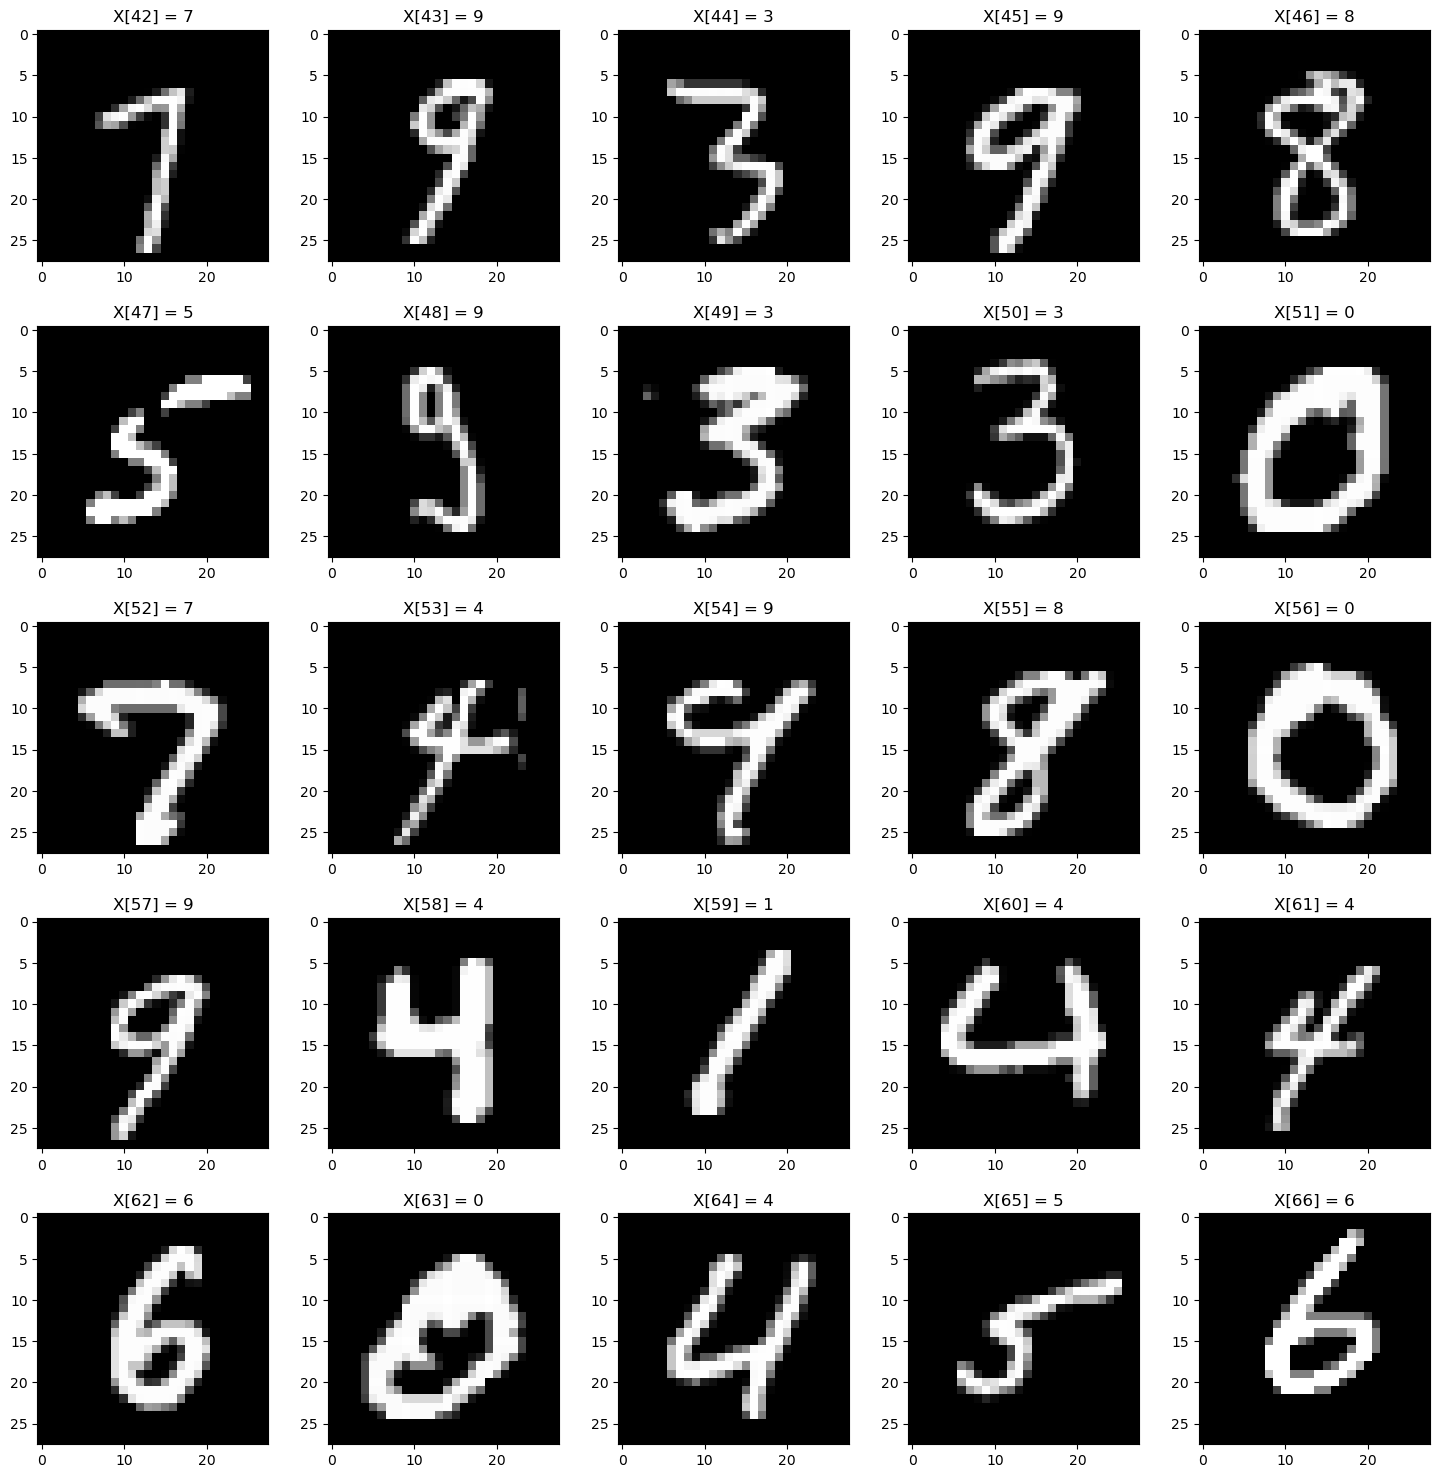

In [28]:
plt.figure(figsize=(15,15))
for i in range(25):
    # Select any number:
    any_number = X_train[42+i]
    # Transform it into an equivalent 2D array
    any_digit_image = any_number.reshape(28,28)
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(any_digit_image, cmap='gray', interpolation="nearest")
    xlabel = 'X[{X}] = {y}'.format(X=(42+i), y=y.values[42+i])
    plt.title(xlabel)
    plt.tight_layout(pad=1.5)
plt.show()

This method was able to keep the clarity of the visual representation while making easier the data to process by linear algorithms. That is why it has been chosen.

## 2.3 CNN Data Preprocesing

For CNN we need the array in a special shape, this is needed for it to be compatible with the Conv2D layers. For that we reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1). The canal = 1 is for gray scale.

In [29]:
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)

In [30]:
X_train_cnn[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

That creates 60000 train arrays of 28 subarrays with 28 elements each of 1 dimension each element because of 1 color being used.

And 10000 similar test arrays.

Also, Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

In [31]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

X_train_cnn.shape, X_test_cnn.shape, y_train_cnn.shape, y_test_cnn.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

# 3. Model Creation

Create object instances for each algorithm:
• Logistic Regression • SVM • Random Forest • Neural Network (MLP) • CNN

## 3.1 • Logistic Regression

This model creates a set of logistic fuctions that return a probability for the input being each possible output (in this case for each number 0-9). 
Instead of a line this function has an S shape.

It uses "maximum likelihood" instead of R^2 to aproximate the function that best adjust to the data samples.

Visually explained at:
https://www.youtube.com/watch?v=yIYKR4sgzI8

Solver 'lbfgs' has proven to be faster tha the default, and in this case is needed to increase max_iter for the algorith to converge:

In [32]:
clf_lr = LogisticRegression(C=10, tol=0.01, solver='lbfgs', max_iter=10000)

## 3.2 • SVM

Support Vector Machines

It is al algorithm based on perceptrons that "outputs an optimal hyperplane wich categorizes new examples". 
By example the hyperplane can be a line in R2 or a plane in R3.

This algoritm uses support vectors (directed to individual data points) to determine margin between the samples and kernel transformations (this allow to separate clusters of data using dimensions in an easier form).

Visually explained at:
https://www.youtube.com/watch?v=YSYdsY67e58

The kernel choice was done folliwing the example of NISHAN PATEL (https://www.kaggle.com/nishan192/mnist-digit-recognition-using-svm) obtaining good results.

In [33]:
clf_svm = svm.SVC(kernel='linear')

## 3.3 • Random Forest

Is an improvement to regular decision trees wich are very sensitive to input data. 

It makes a set of of decision trees based on the creation of new random datasets from our original data (sets of rows), this is called bootstrap.
And for each new row we only use a ramdom subset of features (columns).

Based on those new matrixes we form the forest of new decision trees. For new data, we make it pass through all trees and select the result with the larger count (called aggregation). Thus each tree makes a vote.

Visually explained at:
https://www.youtube.com/watch?v=v6VJ2RO66Ag

In [34]:
clf_rf = RandomForestClassifier(n_estimators=10)

## 3.4 •  Neural Network (MLP)

MultiLayer Perceptron

It is a neural network, each neuron "draws" a line that separates the data. More neurons in hidden layers allow it to create more complex functions. For example: instead of a simple line, a set of lines or even something like a circle if required.

Visually explained at:
https://www.youtube.com/watch?v=AZEfmoWBXwg

In [35]:
clf_mlp = MLPClassifier(random_state=1, max_iter=300)

## 3.5 •  Convolutional neural network (CNN)

This is a special kind of Feed Forward Architecture for neuronal networks based on an Input Layer, Hidden Layers, and an Output Layer. It is deep (with more than 2 hidden layers). 

The input layer has as many neurons as pixels in the image (28*28) and the output layer the possible values of the prediction (0-9). 

This model uses is baed on three types of layers:
    Convolution Layers to match "pieces" or "patterns" of the images. This match uses filtering, a math algorith for each possible pattern of the image. This way "one image becomes a stack of filtered images".
    Pooling to reduce the size of those images in a significant manner.
    And ReLUs function Layers to normalize without negatives the stacks of images.
    
In the order and quantity that we would decide. For this MNIST model i will use the proposed by FRANKLE MUCHAHARY (https://www.kaggle.com/franklemuchahary/basic-cnn-keras-with-cross-validation) wich bring a very high accuracy with relatively few layers.

For further use during cross validation this model will be created inside a def instruction:

In [36]:
def cnn_model(size, num_cnn_layers):
    NUM_FILTERS = 32
    KERNEL = (3, 3)
    MAX_NEURONS = 120
    
    model = Sequential()
    
    for i in range(1, num_cnn_layers+1):
        if i == 1:
            model.add(Conv2D(NUM_FILTERS*i, KERNEL, input_shape=size, activation='relu', padding='same'))
        else:
            model.add(Conv2D(NUM_FILTERS*i, KERNEL, activation='relu', padding='same'))

    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(int(MAX_NEURONS), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(int(MAX_NEURONS/2), activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

Before creating the model we only declare a constant with the dimensions of the image size.

In [37]:
IMAGE_SIZE = (28, 28, 1)
clf_cnn = cnn_model(IMAGE_SIZE, 2)
clf_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               1505400   
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                7

# 4. Adjust Model with Historic Data

Training (fit) step for each model.

## 4.1 • Logistic Regression

In [38]:
clf_lr.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=10000, tol=0.01)

## 4.2 • SVM

In [39]:
clf_svm.fit(X_train,y_train)

SVC(kernel='linear')

## 4.3 • Random Forest

In [40]:
clf_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

## 4.4 •  Neural Network (MLP)

In [41]:
clf_mlp.fit(X_train,y_train)

MLPClassifier(max_iter=300, random_state=1)

## 4.5 •  Convolutional neural network (CNN)

In [42]:
history = clf_cnn.fit(X_train_cnn, y_train_cnn, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.1721 - accuracy: 0.9479 - val_loss: 0.0537 - val_accuracy: 0.9833
Epoch 2/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0631 - accuracy: 0.9809 - val_loss: 0.0418 - val_accuracy: 0.9869
Epoch 3/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0435 - accuracy: 0.9857 - val_loss: 0.0432 - val_accuracy: 0.9883
Epoch 4/10
1500/1500 [==============================] - 62s 42ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.0421 - val_accuracy: 0.9883
Epoch 5/10
1500/1500 [==============================] - 64s 42ms/step - loss: 0.0266 - accuracy: 0.9918 - val_loss: 0.0387 - val_accuracy: 0.9902
Epoch 6/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0405 - val_accuracy: 0.9901
Epoch 7/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0186 - accuracy: 0.9939 - val_loss: 0.0403 -

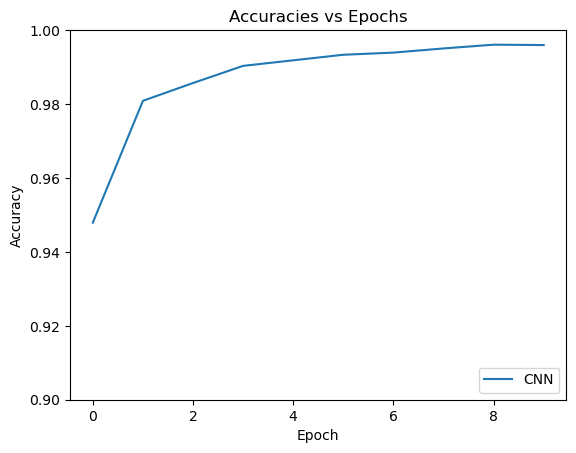

In [43]:
plt.title('Accuracies vs Epochs')
plt.plot(history.history['accuracy'], label='CNN')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.show()

# 5. Prediction for new Data

### Testing step against unknown data (for the model).

## 5.1 • Logistic Regression

In [44]:
y_predict_lr = clf_lr.predict(X_test)

## 5.2 • SVM

In [45]:
y_predict_svm = clf_svm.predict(X_test)

## 5.3 • Random Forest

In [46]:
y_predict_rf = clf_rf.predict(X_test)

## 5.4 •  Neural Network (MLP)

In [47]:
y_predict_mlp = clf_mlp.predict(X_test)

## 5.5 •  Convolutional neural network (CNN)

In [48]:
y_predict_cnn = clf_cnn.predict(X_test_cnn)

# 6. Visualization of Results

### Cross validation score, tables, graphs, confusion matrix and accuracy score for each classifier.

## 6.1 Cross validation score

### • Logistic Regression 

In [49]:
cross_val_score(clf_lr, X_train, y_train, cv=3, scoring="accuracy")

array([0.90925, 0.91025, 0.91325])

### • SVM

In [50]:
cross_val_score(clf_svm, X_train, y_train, cv=3, scoring="accuracy")

array([0.93175, 0.931  , 0.933  ])

### • Random Forest 

In [51]:
cross_val_score(clf_rf, X_train, y_train, cv=3, scoring="accuracy")

array([0.93815, 0.9384 , 0.94225])

### • Neural Network (MLP) 

In [52]:
cross_val_score(clf_mlp, X_train, y_train, cv=3, scoring="accuracy")

array([0.97375, 0.96555, 0.97385])

### • CNN

In [53]:
#define a function to fit the model
def fit_and_evaluate_cnn(clf_cnn_model, X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn):
    history = clf_cnn_model.fit(X_train_cnn, y_train_cnn, validation_split=0.2, epochs=10)
    #print("Val Score: ", clf_cnn_model.evaluate(X_test_cnn, y_test_cnn))
    return history

n_folds=3

train_x = np.split(X_train_cnn, 3)
train_y = np.split(y_train_cnn, 3)
test_x = np.split(X_test_cnn[:9999], 3)
test_y = np.split(y_test_cnn[:9999], 3)

#save the model history in a list after fitting so that we can plot later
model_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    clf_cnn_fold = cnn_model(IMAGE_SIZE, 2)
    model_history.append(fit_and_evaluate_cnn(clf_cnn_fold, train_x[i], test_x[i], train_y[i], test_y[i]))
    print("======="*12, end="\n")

Training on Fold:  1
Epoch 1/10
500/500 [==============================] - 20s 41ms/step - loss: 0.3313 - accuracy: 0.8978 - val_loss: 0.0939 - val_accuracy: 0.9697
Epoch 2/10
500/500 [==============================] - 21s 43ms/step - loss: 0.1023 - accuracy: 0.9686 - val_loss: 0.0732 - val_accuracy: 0.9775
Epoch 3/10
500/500 [==============================] - 21s 42ms/step - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0731 - val_accuracy: 0.9803
Epoch 4/10
500/500 [==============================] - 21s 42ms/step - loss: 0.0462 - accuracy: 0.9851 - val_loss: 0.0566 - val_accuracy: 0.9860
Epoch 5/10
500/500 [==============================] - 21s 42ms/step - loss: 0.0350 - accuracy: 0.9873 - val_loss: 0.0634 - val_accuracy: 0.9815
Epoch 6/10
500/500 [==============================] - 20s 40ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.0561 - val_accuracy: 0.9835
Epoch 7/10
500/500 [==============================] - 21s 42ms/step - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0

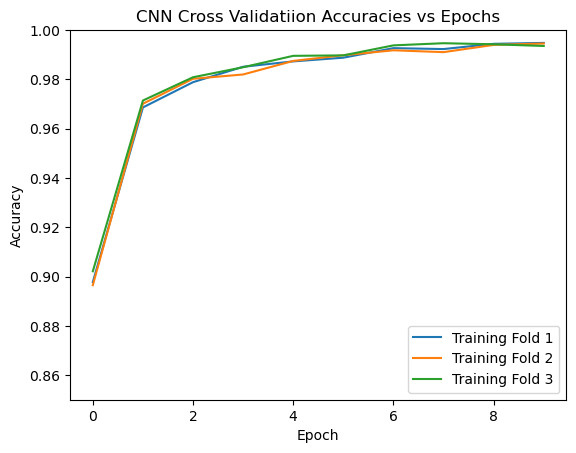

In [54]:
plt.title('CNN Cross Validatiion Accuracies vs Epochs')
plt.plot(model_history[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_history[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_history[2].history['accuracy'], label='Training Fold 3')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.85, 1])
plt.legend(loc='lower right')
plt.show()

### 6.1.1 Cross Validation Results:

| Method              | Cross Validation 1 | Cross Validation 2 | Cross Validation 3  |
|---------------------|--------------------|--------------------|---------------------|
| Logistic Regression | 0.90925            | 0.91025            | 0.9133              |
| SVM                 | 0.93175            | 0.931              | 0.933               |
| Random Forest       | 0.9407             | 0.9389             | 0.94095             |
| MLP                 | 0.97375            | 0.96555            | 0.97385             |
| CNN                 | 0.9833             | 0.9837             | 0.9845              |


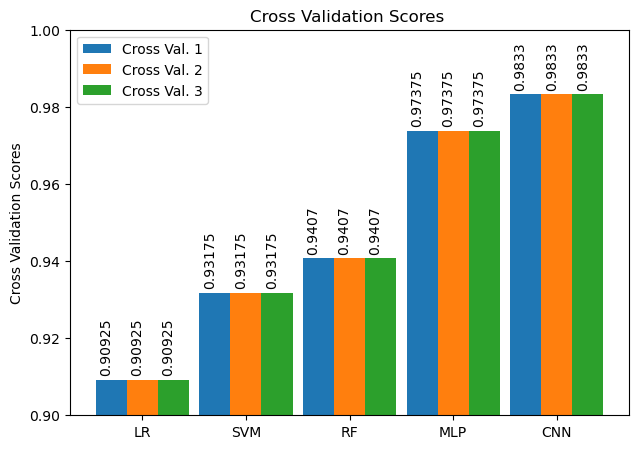

In [55]:
labels = ['LR', 'SVM', 'RF', 'MLP', 'CNN']
cv1 = [0.90925, 0.93175, 0.9407, 0.97375, 0.9833]
cv2 = [0.91025, 0.931, 0.9389, 0.96555, 0.9837]
cv3 = [0.9133, 0.933, 0.94095, 0.97385, 0.9845]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, cv1, width, label='Cross Val. 1')
rects2 = ax.bar(x, cv1, width, label='Cross Val. 2')
rects3 = ax.bar(x + width, cv1, width, label='Cross Val. 3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cross Validation Scores')
ax.set_title('Cross Validation Scores ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation='vertical')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.ylim([0.9, 1])

plt.show()

## 6.2 Confusion Matrix

In [56]:
#function to draw confusion matrix
def draw_confusion_matrix(true, preds, cmap, title):
    # Set Figure
    fig = plt.figure(figsize=(10, 10)) 
    # Fill matrix
    conf_matx = confusion_matrix(true, preds)
    # Plot Confusion matrix
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap=cmap)
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values');
    plt.title(title)
    plt.show()

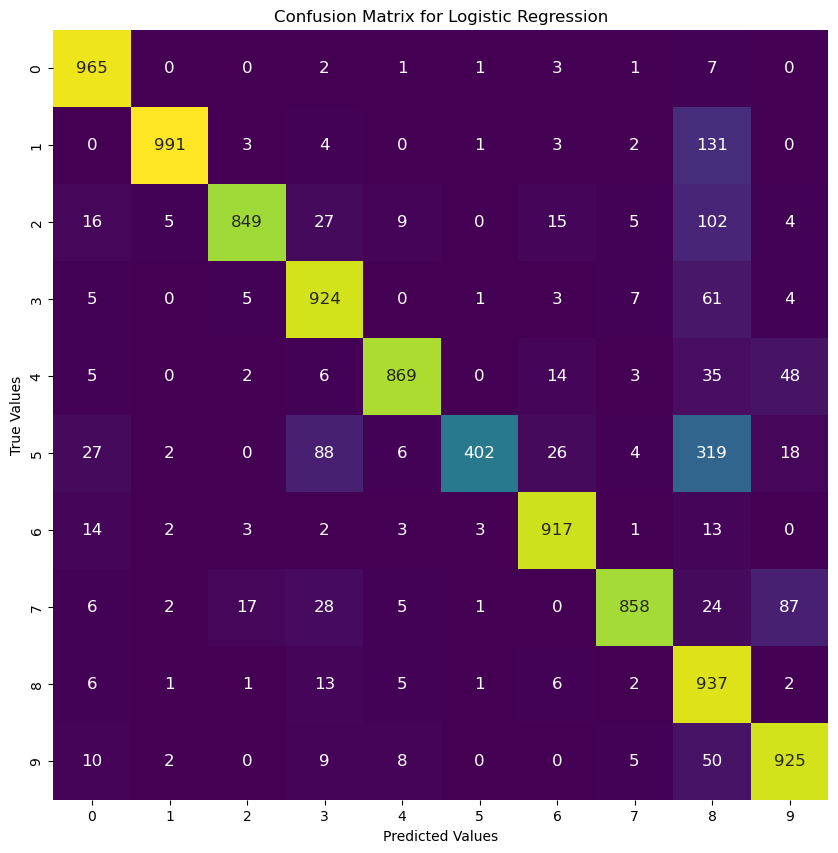

In [57]:
draw_confusion_matrix(y_test, y_predict_lr, "viridis", 'Confusion Matrix for Logistic Regression')

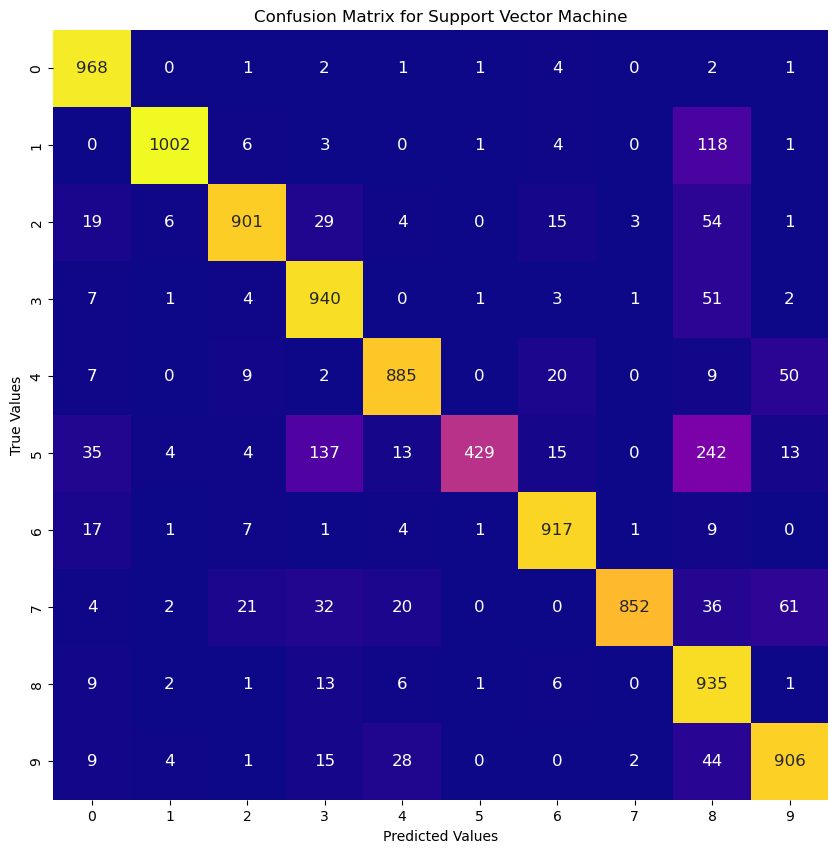

In [58]:
draw_confusion_matrix(y_test, y_predict_svm, "plasma", 'Confusion Matrix for Support Vector Machine')

In [59]:
draw_confusion_matrix(y_test, y_predict_rf, "inferno", 'Confusion Matrix for Random Forest')

In [60]:
draw_confusion_matrix(y_test, y_predict_mlp, "magma", 'Confusion Matrix for MLP')

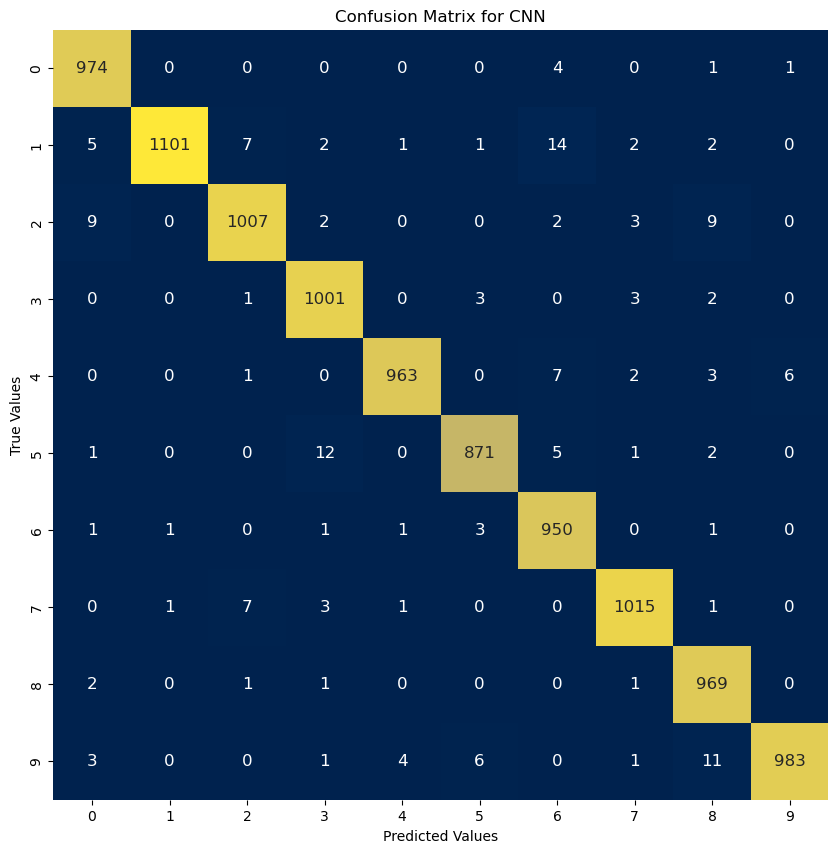

In [61]:
Y_pred = np.argmax(y_predict_cnn, 1) # Decode Predicted labels
Y_test = np.argmax(y_test_cnn, 1) # Decode labels
draw_confusion_matrix(Y_test, Y_pred, "cividis", 'Confusion Matrix for CNN')

## 6.3 Accuracy Score

In [62]:
accuracy_score(y_test, y_predict_lr)

0.8637

In [63]:
accuracy_score(y_test, y_predict_svm)

0.8735

In [64]:
accuracy_score(y_test, y_predict_rf)

0.9147

In [65]:
accuracy_score(y_test, y_predict_mlp)

0.9774

In [66]:
test_loss, test_acc = clf_cnn.evaluate(X_test_cnn,  y_test_cnn, verbose=2)
print(test_acc)

313/313 - 3s - loss: 20.0694 - accuracy: 0.9834
0.9833999872207642


### 6.3.1 Accuracy Score Results:

| Method              | Accuracy Score |
|---------------------|----------------|
| Logistic Regression | 0.8637         |
| SVM                 | 0.8735         |
| Random Forest       | 0.9249         |
| MLP                 | 0.9774         |
| CNN                 | 0.9810         |


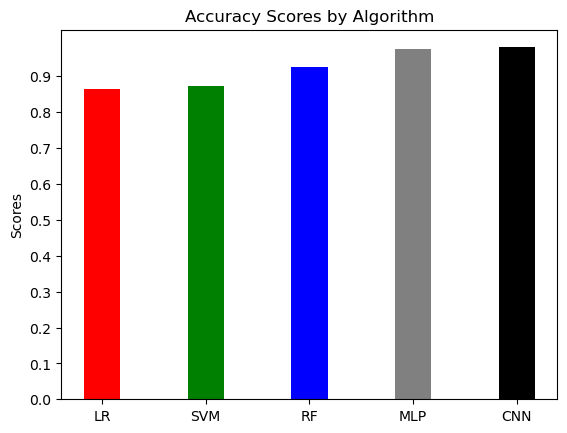

In [67]:
N = 5
acc_score = (0.8637,0.8735,0.9249,0.9774,0.9810)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, acc_score, width, color=['red', 'green', 'blue', 'gray', 'black'])

plt.ylabel('Scores')
plt.title('Accuracy Scores by Algorithm')
plt.xticks(ind, ('LR', 'SVM', 'RF', 'MLP', 'CNN'))
plt.yticks(np.arange(0, 1, .1))

plt.show()

## 6.4 Test with own created image

### 6.4.1 Load and show local file of created image in jpg format.

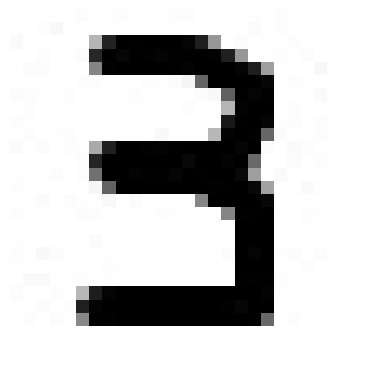

In [79]:
jpgfile3 = Image.open("tres.jpg")
plt.imshow(jpgfile3, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

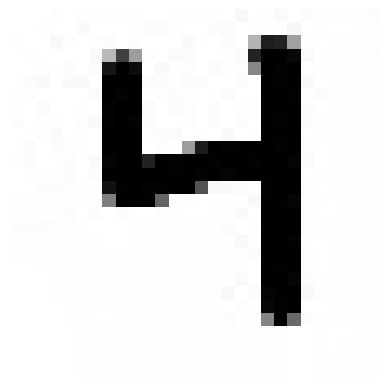

In [69]:
jpgfile4 = Image.open(".\\cuatro.jpg")
plt.imshow(jpgfile4, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [70]:
jpgfile9 = Image.open(".\\nueve.jpg")
plt.imshow(jpgfile9, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

### 6.4.2 Data preprocessing

In [71]:
# Change images to 1 channel (black and white)
jpgfile3 = jpgfile3.convert("L")
jpgfile4 = jpgfile4.convert("L")
jpgfile9 = jpgfile9.convert("L")

# Load images into arrays
mynumber3 = np.array(jpgfile3)
mynumber4 = np.array(jpgfile4)
mynumber9 = np.array(jpgfile9)

# Normalize
mynumber3 = mynumber3 / 255.0
mynumber4 = mynumber4 / 255.0
mynumber9 = mynumber9 / 255.0

# Print shapes
mynumber3.shape, mynumber4.shape, mynumber9.shape

((28, 28), (28, 28), (28, 28))

Prepare input format for models for each number.

In [72]:
mynumber3 = mynumber3.reshape(1, 28*28)
mynumber3cnn = mynumber3.reshape(-1,28,28,1)

mynumber4 = mynumber4.reshape(1, 28*28)
mynumber4cnn = mynumber4.reshape(-1,28,28,1)

mynumber9 = mynumber9.reshape(1, 28*28)
mynumber9cnn = mynumber9.reshape(-1,28,28,1)

### 6.4.3 Generate new predictions

In [73]:
y_predict_lr = clf_lr.predict(mynumber3)
y_predict_svm = clf_svm.predict(mynumber3)
y_predict_rf = clf_rf.predict(mynumber3)
y_predict_mlp = clf_mlp.predict(mynumber3)
y_predict_cnn = clf_cnn.predict(mynumber3cnn)

Look at results, expected '3'.

In [74]:
Y_pred = np.argmax(y_predict_cnn, 1) # Decode Predicted labels
y_predict_lr, y_predict_svm, y_predict_rf, y_predict_mlp, Y_pred

(array(['5'], dtype=object),
 array(['2'], dtype=object),
 array(['2'], dtype=object),
 array(['5'], dtype='<U1'),
 array([2], dtype=int64))

Repeat for 4 image.

In [75]:
y_predict_lr = clf_lr.predict(mynumber4)
y_predict_svm = clf_svm.predict(mynumber4)
y_predict_rf = clf_rf.predict(mynumber4)
y_predict_mlp = clf_mlp.predict(mynumber4)
y_predict_cnn = clf_cnn.predict(mynumber4cnn)

Look at results, expected '4'.

In [76]:
Y_pred = np.argmax(y_predict_cnn, 1) # Decode Predicted labels
y_predict_lr, y_predict_svm, y_predict_rf, y_predict_mlp, Y_pred

(array(['2'], dtype=object),
 array(['2'], dtype=object),
 array(['8'], dtype=object),
 array(['5'], dtype='<U1'),
 array([3], dtype=int64))

Repeat for 9 image.

In [77]:
y_predict_lr = clf_lr.predict(mynumber9)
y_predict_svm = clf_svm.predict(mynumber9)
y_predict_rf = clf_rf.predict(mynumber9)
y_predict_mlp = clf_mlp.predict(mynumber9)
y_predict_cnn = clf_cnn.predict(mynumber9cnn)

Look at results, expected '9'.

In [78]:
Y_pred = np.argmax(y_predict_cnn, 1) # Decode Predicted labels
y_predict_lr, y_predict_svm, y_predict_rf, y_predict_mlp, Y_pred

(array(['2'], dtype=object),
 array(['2'], dtype=object),
 array(['2'], dtype=object),
 array(['5'], dtype='<U1'),
 array([5], dtype=int64))

### 6.4.4 Observations

Despite the high accuracy obtained in the test of the models, no one get the expected result against paint generated numbers. This only shows the relevance of data preprocessing. It is evident that paint generated images are not that similar to the ones existing in our train or test MNIST data set.

# References

1. MICHAEL GALARNYK, Logistic Regression using Python (scikit-learn), towardsdatascience, 2017, https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
2. JOSH STARMER, StatQuest: Logistic Regression, Youtube, 2018, https://www.youtube.com/watch?v=yIYKR4sgzI8
3. NISHAN PATEL, MNIST Digit recognition using SVM, Kaggle, 2019, https://www.kaggle.com/nishan192/mnist-digit-recognition-using-svm
4. SIDDHARTH SHAMA, Support Vector Machines and Logistic Regression (Learn ML vid 5), 2020, https://www.youtube.com/watch?v=YSYdsY67e58
5. Normalizaed Nerd, Random Forest Algorithm Clearly Explained!, 2021, https://www.youtube.com/watch?v=v6VJ2RO66Ag
6. OSCAR ALSING FERREIRA, But How Does The MultiLayer Perceptron Actually Work?, Youtube, 2017,  https://www.youtube.com/watch?v=AZEfmoWBXwg
7. FRANKLE MUCHAHARY, Basic CNN Keras with cross validation, Kaggle, 2018, https://www.kaggle.com/franklemuchahary/basic-cnn-keras-with-cross-validation
8. deeplizar, Convolutional Neural Networks (CNNs) explained, Youtube, 2017, https://www.youtube.com/watch?v=YRhxdVk_sIs